# Bike Rental Company Data Analysis and Optimization

## Project Overview

In this challenge, we are tasked with analyzing data from Citi Bike rental company to provide insights and recommendations that will optimize their operations. The company aims to better understand how bikes should be distributed among various stations and determine the optimal stock levels required to meet demand efficiently.

## Data Source

The data for this project is publicly available and can be accessed through the following URL: [Citi Bike NYC System Data](https://citibikenyc.com/system-data). The data repository contains detailed trip data, including information on bike usage, station locations, and temporal patterns.

## Objective

The primary objective of this analysis is to:

- **Perform Exploratory Data Analysis (EDA):** Understand the available data, identify patterns, and derive insights related to bike usage.
- **Predictive Modeling:** Develop machine learning models to predict bike demand at different stations and times.
- **Optimization:** Propose strategies to optimize the distribution of bikes across stations and manage stock levels, ensuring that supply meets demand efficiently.

## Approach

We will approach this challenge by:

1. **Exploratory Data Analysis (EDA):** Analyzing patterns in bike usage, user behavior, and station performance.
2. **Demand Prediction:** Using machine learning models to forecast bike demand at various stations based on historical data.
3. **Optimization Strategies:** Proposing dynamic bike reallocation strategies and stock management recommendations.

This notebook will document the entire process, from initial data exploration to final recommendations, showcasing a comprehensive approach to solving the bike rental company's operational challenges.


In [1]:
#Import all necessary libraries
import os
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
#I have fifth csv file from 05-2024
#Load the data
df = pd.read_csv('202405_citibike_tripdata_5.csv')

/var/folders/b6/3nqs1jcn06b6_j_d0f_4vm4r0000gn/T/ipykernel_6353/4135493908.py:3: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('202405_citibike_tripdata_5.csv')


In [3]:
#display all the columns in the dataframe
pd.set_option('display.max_columns', None)

In [4]:
#Print first 5 rows of dataframe
df.head(5)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,AD29C0EB02CCAB09,classic_bike,2024-05-01 16:14:42,2024-05-01 16:25:53,E 6 St & Ave B,5584.04,E 16 St & Irving Pl,5938.11,40.724537,-73.981854,40.735367,-73.987974,member
1,80DD17CA57C45921,electric_bike,2024-05-16 17:57:37,2024-05-16 18:04:30,Scholes St & Manhattan Ave,5108.01,Metropolitan Ave & Bedford Ave,5308.04,40.708651,-73.944878,40.715348,-73.960241,member
2,6EAA75427C2CB2D8,electric_bike,2024-05-23 17:02:35,2024-05-23 17:18:49,Sharon St & Olive St,5323.06,Metropolitan Ave & Bedford Ave,5308.04,40.715340,-73.938393,40.715348,-73.960241,member
3,700278157C0AC354,classic_bike,2024-05-02 06:52:23,2024-05-02 07:01:07,Prospect Park West & 8 St,3722.04,Dean St & Franklin Ave,4107.13,40.665147,-73.976376,40.677592,-73.955637,member
4,00ED91829C30FA66,electric_bike,2024-05-17 20:19:32,2024-05-17 20:33:33,E 2 St & Ave A,5553.10,Metropolitan Ave & Bedford Ave,5308.04,40.723335,-73.986055,40.715348,-73.960241,member


In [5]:
#Print columns name 
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')

In [6]:
#Print shape of dataframe
df.shape

(230360, 13)

In [7]:
#Print information about a DataFrame including the index dtype and columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230360 entries, 0 to 230359
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             230360 non-null  object 
 1   rideable_type       230360 non-null  object 
 2   started_at          230360 non-null  object 
 3   ended_at            230360 non-null  object 
 4   start_station_name  230339 non-null  object 
 5   start_station_id    230339 non-null  object 
 6   end_station_name    230360 non-null  object 
 7   end_station_id      230318 non-null  object 
 8   start_lat           230360 non-null  float64
 9   start_lng           230360 non-null  float64
 10  end_lat             230360 non-null  float64
 11  end_lng             230360 non-null  float64
 12  member_casual       230360 non-null  object 
dtypes: float64(4), object(9)
memory usage: 22.8+ MB


In [8]:
# Check for missing values
df.isnull().sum()

ride_id                0
rideable_type          0
started_at             0
ended_at               0
start_station_name    21
start_station_id      21
end_station_name       0
end_station_id        42
start_lat              0
start_lng              0
end_lat                0
end_lng                0
member_casual          0
dtype: int64

In [9]:
#Drop NaN values
df.dropna(inplace=True)#

In [10]:
# Convert date columns to datetime
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

# Feature Engineering: Extract useful time-based features
df['trip_duration'] = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60  
df['day_of_week'] = df['started_at'].dt.day_name()
df['hour_of_day'] = df['started_at'].dt.hour
df['month'] = df['started_at'].dt.month_name()

In [11]:
df.head(5)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,trip_duration,day_of_week,hour_of_day,month
0,AD29C0EB02CCAB09,classic_bike,2024-05-01 16:14:42,2024-05-01 16:25:53,E 6 St & Ave B,5584.04,E 16 St & Irving Pl,5938.11,40.724537,-73.981854,40.735367,-73.987974,member,11.183333,Wednesday,16,May
1,80DD17CA57C45921,electric_bike,2024-05-16 17:57:37,2024-05-16 18:04:30,Scholes St & Manhattan Ave,5108.01,Metropolitan Ave & Bedford Ave,5308.04,40.708651,-73.944878,40.715348,-73.960241,member,6.883333,Thursday,17,May
2,6EAA75427C2CB2D8,electric_bike,2024-05-23 17:02:35,2024-05-23 17:18:49,Sharon St & Olive St,5323.06,Metropolitan Ave & Bedford Ave,5308.04,40.715340,-73.938393,40.715348,-73.960241,member,16.233333,Thursday,17,May
3,700278157C0AC354,classic_bike,2024-05-02 06:52:23,2024-05-02 07:01:07,Prospect Park West & 8 St,3722.04,Dean St & Franklin Ave,4107.13,40.665147,-73.976376,40.677592,-73.955637,member,8.733333,Thursday,6,May
4,00ED91829C30FA66,electric_bike,2024-05-17 20:19:32,2024-05-17 20:33:33,E 2 St & Ave A,5553.10,Metropolitan Ave & Bedford Ave,5308.04,40.723335,-73.986055,40.715348,-73.960241,member,14.016667,Friday,20,May


In [12]:
#Print description of the data in the DataFrame
df.describe()

,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,trip_duration,hour_of_day
count,230297,230297,230297.000000,230297.000000,230297.000000,230297.000000,230297.000000,230297.000000
mean,2024-05-17 02:07:37.222495232,2024-05-17 02:20:58.260241664,40.737724,-73.973044,40.737859,-73.973412,13.350629,14.194345
min,2024-05-01 00:01:21,2024-05-01 00:05:55,40.577405,-74.038780,40.633385,-74.071959,-0.883333,0.000000
25%,2024-05-08 19:52:15,2024-05-08 20:04:44,40.713342,-73.993924,40.714948,-73.992390,5.116667,10.000000
50%,2024-05-17 17:13:44,2024-05-17 17:27:35,40.737151,-73.980743,40.737169,-73.981225,9.233333,15.000000
75%,2024-05-24 16:27:32,2024-05-24 16:43:44,40.760926,-73.955959,40.762288,-73.957721,16.433333,18.000000
max,2024-05-31 23:59:16,2024-06-01 11:24:10,40.886229,-73.846603,40.885240,-73.853000,1458.866667,23.000000
std,NaN,NaN,0.040178,0.028924,0.040243,0.028437,20.862518,4.996587


# 1. Exploratory Data Analysis

## Preference for Rideable type
  Objective: Understanding the preference for Rideable type distribution helps in optimizing bike stock across stations to meet demand     effectively. 
             For example, if electric bikes are more popular, stations with higher electric bike demand might need more electric bikes.


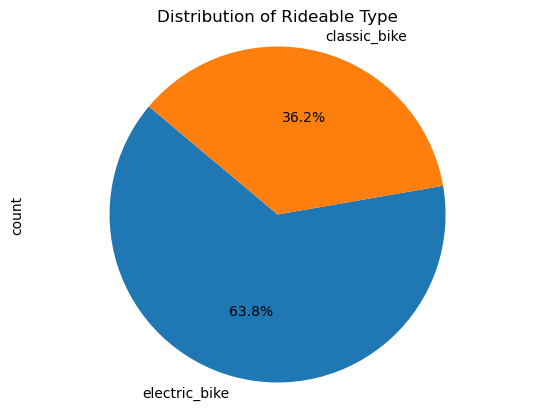

In [84]:
'''Pie chart for preference of classic bike vs electric bike.'''

df['rideable_type'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Rideable Type')
plt.axis('equal')  
plt.show()

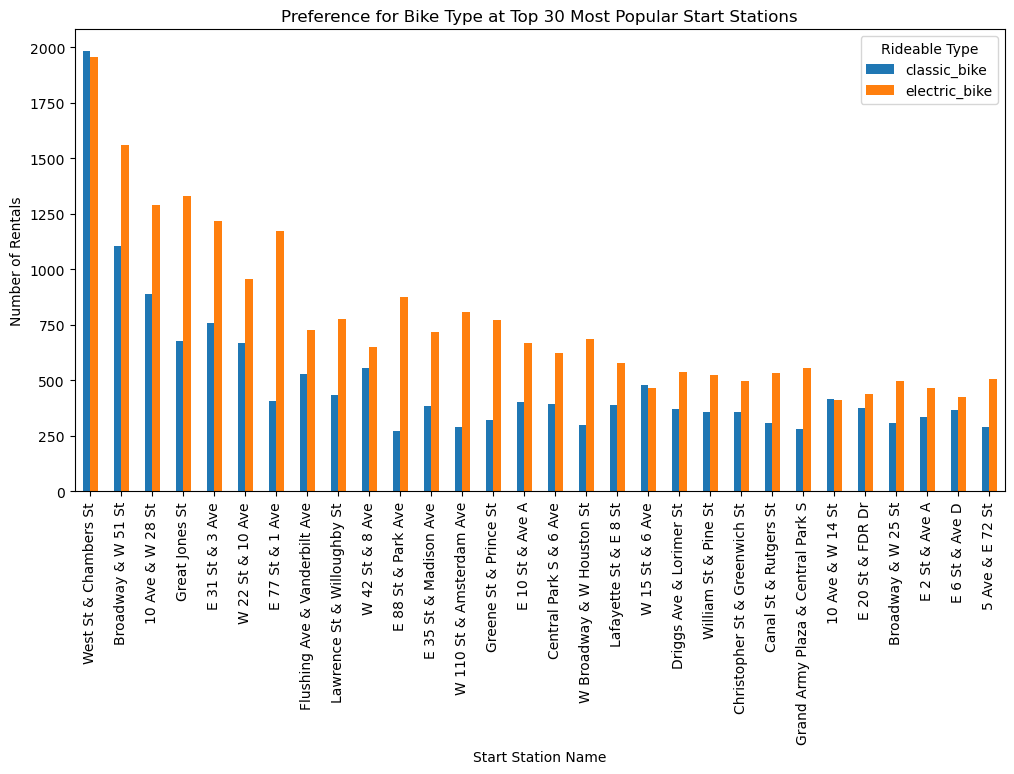

In [85]:
'''Plot for preference for Bike Type at Top 30 Most Popular Start Stations.'''

# Aggregate the number of trips by bike type and start station
bike_type_counts = df.groupby(['start_station_name', 'rideable_type']).size().unstack().fillna(0)

# Get the top 30 most popular start stations based on total number of trips
top_30_stations = bike_type_counts.sum(axis=1).nlargest(30).index
top_30_station_bike_type_counts = bike_type_counts.loc[top_30_stations]

# Plot the bike type preference at top 30 stations
top_30_station_bike_type_counts.plot(kind='bar', figsize=(12, 6))
plt.title('Preference for Bike Type at Top 30 Most Popular Start Stations')
plt.xlabel('Start Station Name')
plt.ylabel('Number of Rentals')
plt.xticks(rotation=90)
plt.legend(title='Rideable Type')
#plt.tight_layout()
plt.show()

##  Member vs Casual Riders Analysis
   Objective: Compare the behaviors of members vs. casual riders and identify station preferences to understand the 
              differences in behavior between subscriber types.


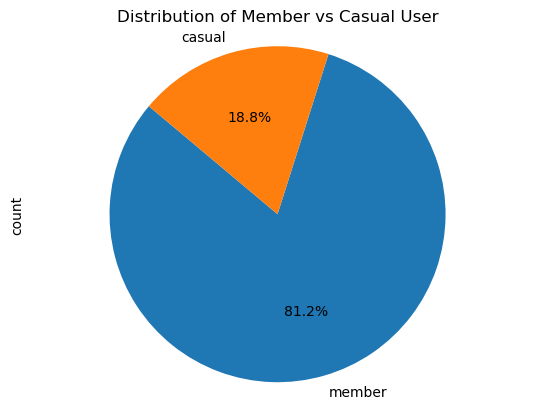

In [86]:
'''Plot for comparing the number of members vs casual riders that gives insights into the user demographics of the bike rental system.'''

df['member_casual'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Member vs Casual User')
plt.axis('equal')  
plt.show()

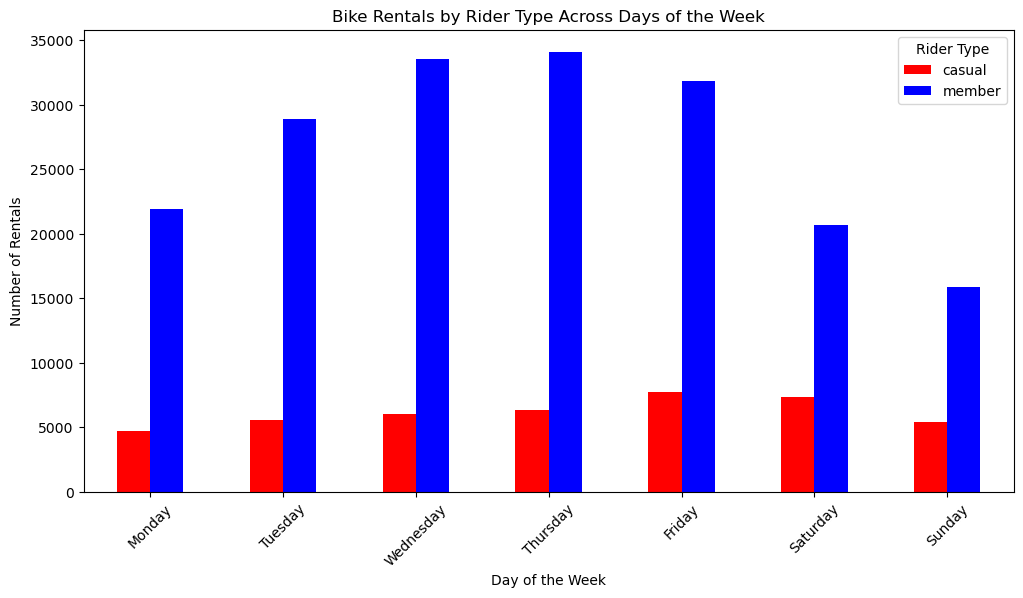

In [87]:
'''Plot for bike rentals by user type (member vs casual) across days of the week to give insight into
   bike rentals vary by day of the week for different user types.'''

# Extract the day of the week (0=Monday, 6=Sunday)
df['day_of_week'] = df['started_at'].dt.dayofweek

# Group by user type and day of the week, and count the number of rides
group_rentals = df.groupby(['member_casual', 'day_of_week']).size().unstack()

# Reorder the days of the week for better readability (optional)
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
group_rentals.columns = days
group_rentals.T.plot(kind='bar', figsize=(12, 6), color=['red','blue'])
plt.title('Bike Rentals by Rider Type Across Days of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Rentals')
plt.xticks(rotation=45)
plt.legend(title='Rider Type', labels=['casual', 'member'])
plt.show()

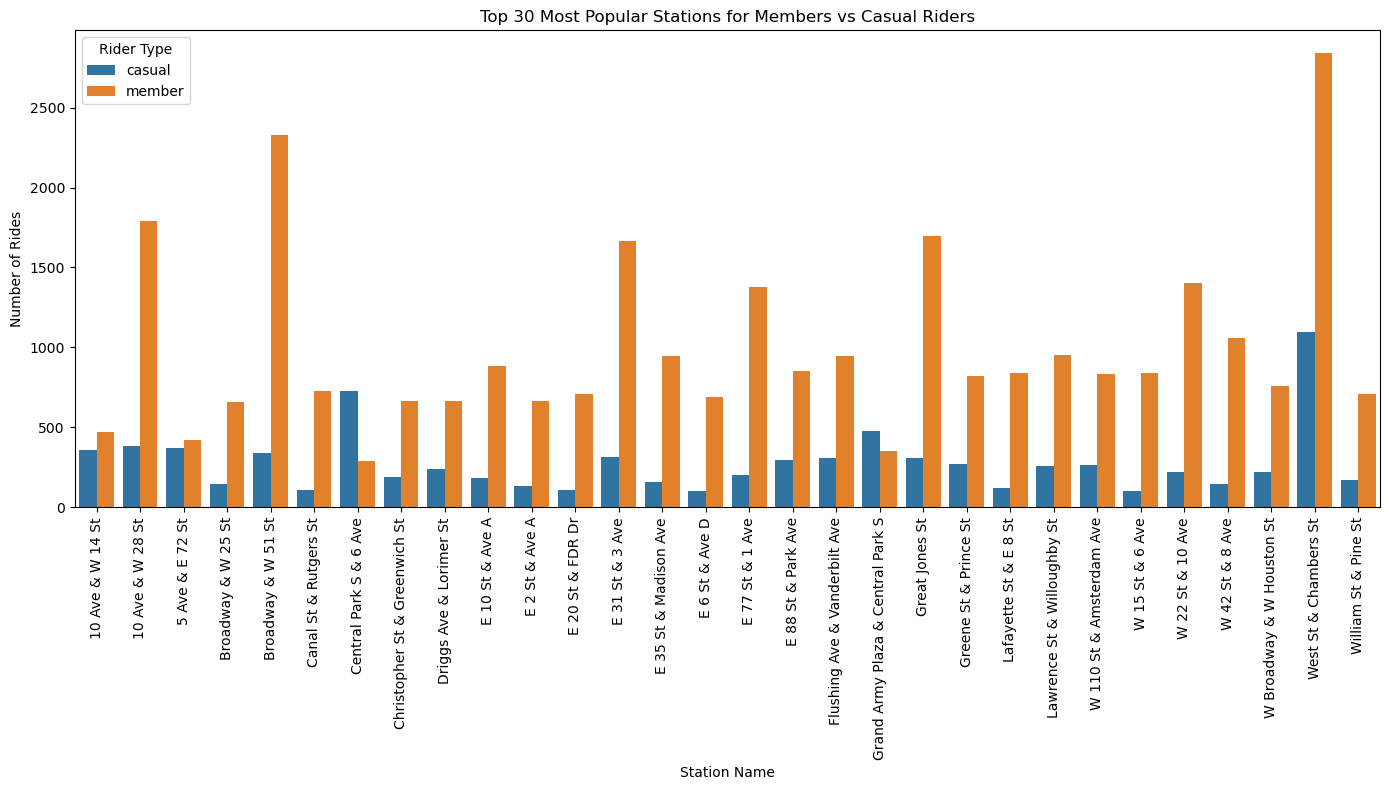

In [88]:
'''Plot for  most popular stations for members vs casual riders, revealing usage patterns and preferences. It helps in optimizing 
   bike distribution and targeting resources effectively at high-demand stations.'''

#Analyze the 30 most popular stations for members vs. casual riders
popular_stations_by_rider = df.groupby(['member_casual', 'start_station_name']).size().reset_index(name='ride_count')

#Get top 30 stations by ride count
top_30_stations = popular_stations_by_rider.groupby('start_station_name')['ride_count'].sum().nlargest(30).index
filtered_data = popular_stations_by_rider[popular_stations_by_rider['start_station_name'].isin(top_30_stations)]

plt.figure(figsize=(14, 8))
sns.barplot(x='start_station_name', y='ride_count', hue='member_casual', data=filtered_data)
plt.xticks(rotation=90)
plt.title('Top 30 Most Popular Stations for Members vs Casual Riders')
plt.xlabel('Station Name')
plt.ylabel('Number of Rides')
plt.legend(title='Rider Type')
plt.tight_layout() 
plt.show()

## Trip Duration Analysis
  Objective: To visualize common trip lengths to understand typical user ride times and compare round trips versus point-to-point travel to  inform bike redistribution and station management.








/Users/shubhanijain/anaconda3/envs/ml/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/shubhanijain/anaconda3/envs/ml/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


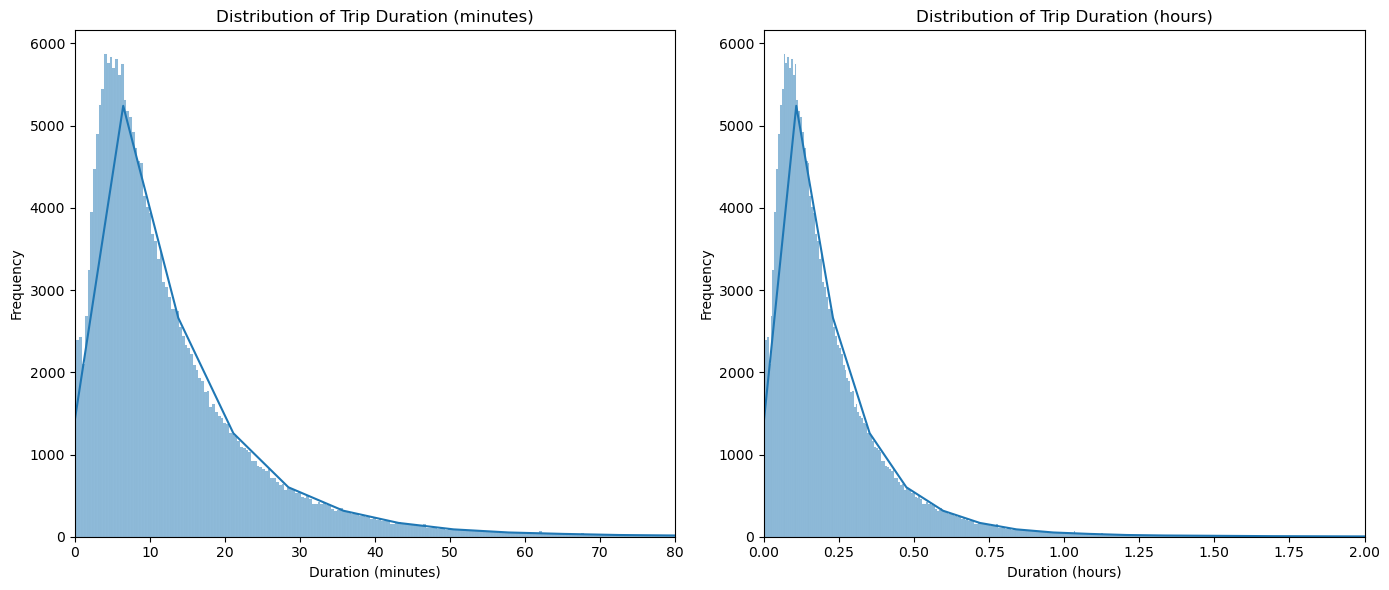

In [89]:
'''Plots for showcasing the distribution of trip durations, helping to identify common trip lengths.'''

# Calculate trip duration in minutes
df['trip_duration_hours'] = df['trip_duration'] / 60

# Create a figure with 1 row and 2 columns for subplots
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Distribution of trip duration in minutes
sns.histplot(df['trip_duration'], kde=True, ax=ax[0])
ax[0].set_xlim(0, 80)
ax[0].set_title('Distribution of Trip Duration (minutes)')
ax[0].set_xlabel('Duration (minutes)')
ax[0].set_ylabel('Frequency')

# Plot 2: Distribution of trip duration in hours
sns.histplot(df['trip_duration_hours'], kde=True, ax=ax[1])
ax[1].set_xlim(0, 2)
ax[1].set_title('Distribution of Trip Duration (hours)')
ax[1].set_xlabel('Duration (hours)')
ax[1].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

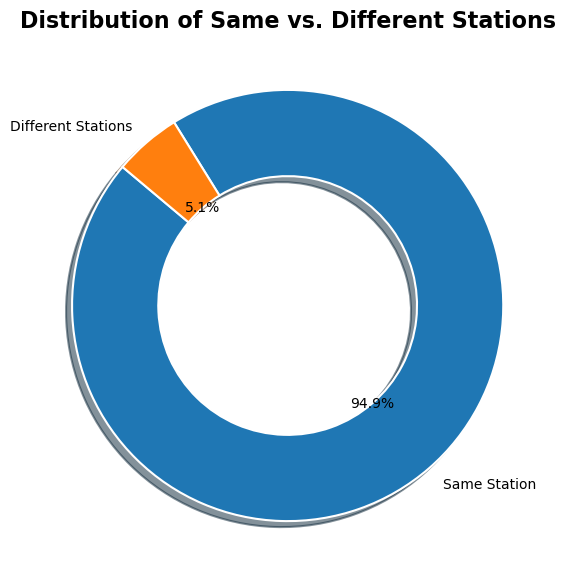

In [92]:
'''Plot for identifying trips where the start and end stations are the same (i.e., round trips) and compare them with trips where 
   the start and end stations are different. Round trips indicate recreational or casual usage, while trips ending at different stations 
   suggest practical or commuter travel.'''

# Identify trips where start and end stations are the same
df['same_station'] = df['start_station_name'] == df['end_station_name']

# Count trips with same and different start/end stations
trip_counts = df['same_station'].value_counts()
trip_labels = ['Same Station', 'Different Stations']

# Define colors and explode parameters for a more artistic look
#colors = ['#ff9999','#66b3ff']
#explode = (0.1, 0)  # Explode the first slice (Same Station)

# Plot artistic pie chart
plt.figure(figsize=(10, 7))

plt.pie(trip_counts, 
        labels=trip_labels, 
        autopct='%1.1f%%', 
        shadow=True, 
        startangle=140,
        wedgeprops=dict(width=0.4, edgecolor='w', linewidth=1.5))

plt.title('Distribution of Same vs. Different Stations', fontsize=16, fontweight='bold')
plt.show()

## Rides usage by day of the week and hour
  Objective: These plots show how bike usage varies with time,revealing patterns like peak usage hours or days.


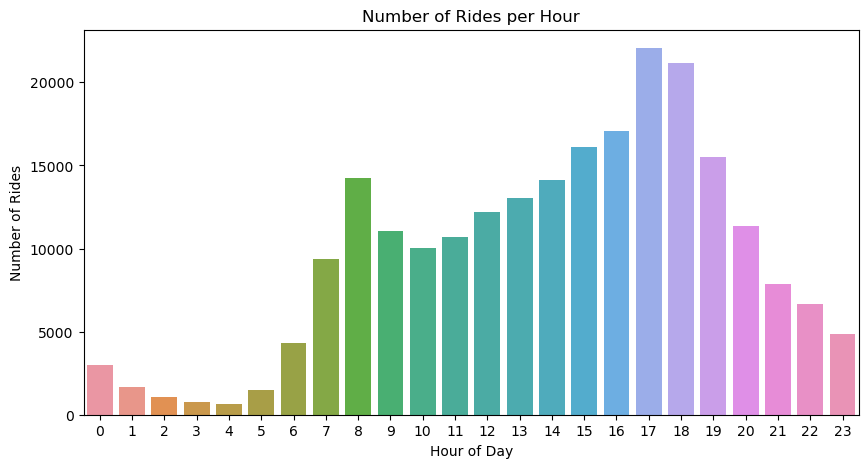

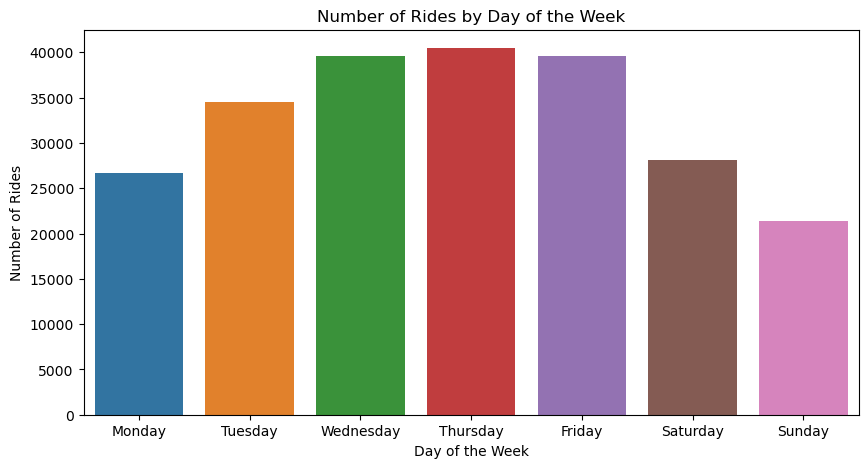

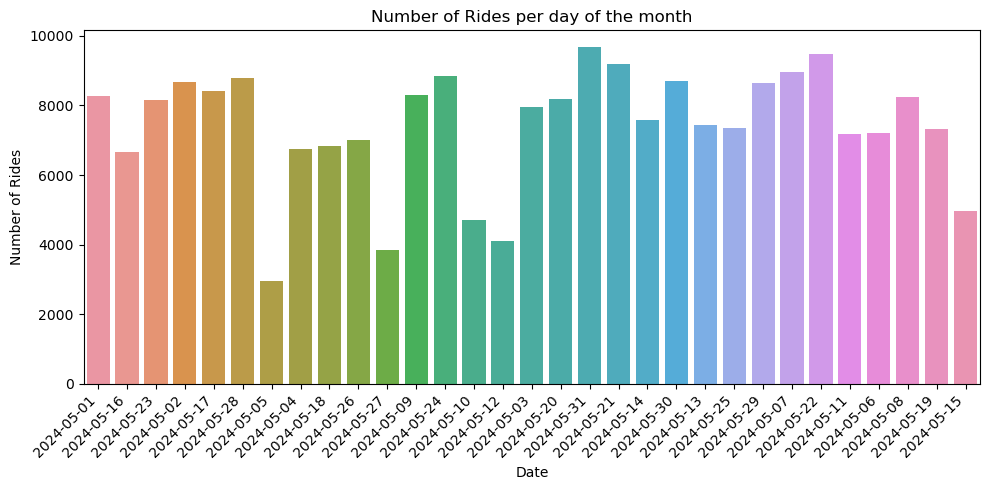

In [93]:
'''Plots for analyzing bike usage over different times'''

# Analyze rides per hour
df['hour'] = df['started_at'].dt.hour
plt.figure(figsize=(10, 5))
sns.countplot(x='hour', data=df)
plt.title('Number of Rides per Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Rides')
plt.show()

# Analyze rides by day of the week
df['day_of_week'] = df['started_at'].dt.day_name()
plt.figure(figsize=(10, 5))
sns.countplot(x='day_of_week', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Number of Rides by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Rides')
plt.show()

# Analyze rides per day of the month
# Extract the date from the 'start_time' column
df['date'] = df['started_at'].dt.date
# Plot the bar chart for daily demand
plt.figure(figsize=(10, 5))
sns.countplot(x='date', data=df)
plt.title('Number of Rides per day of the month')
plt.xlabel('Date')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Station and Popular routes Analysis
  Objective: Station and popular routes analysis reveals the most frequently used stations and travel paths, highlighting high-demand areas    and informing resource allocation. It helps optimize bike distribution and improve station connectivity.

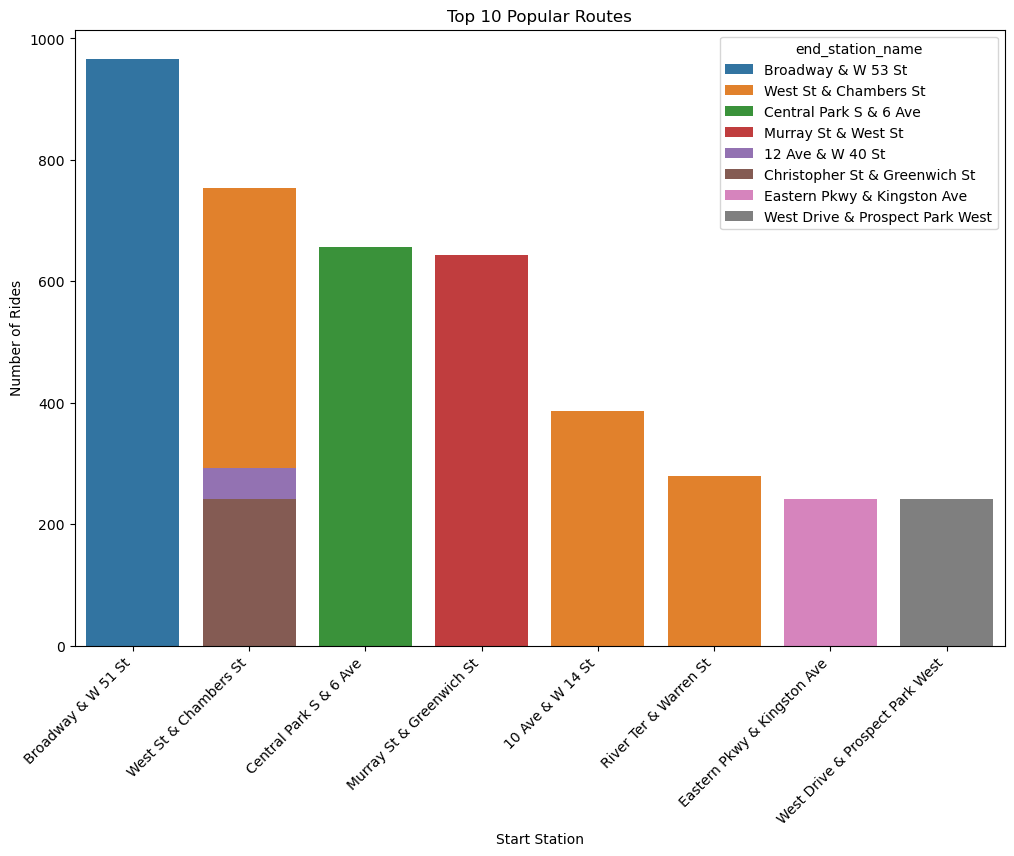

In [94]:
''' Plot of the top 10 most popular start-end station pairs shows the most frequently traveled routes within the bike rental network. 
    This reveals key travel patterns and informs decisions on where to focus bike distribution and infrastructure improvements.'''

# Popular routes (Top 10 start-end station pairs)
top_10_routes = df.groupby(['start_station_name', 'end_station_name']).size().nlargest(10).reset_index(name='count')
plt.figure(figsize=(12, 8))
sns.barplot(data=top_10_routes, x='start_station_name', y='count', hue='end_station_name', dodge=False)
plt.title('Top 10 Popular Routes')
plt.xlabel('Start Station')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45, ha='right')
plt.show()


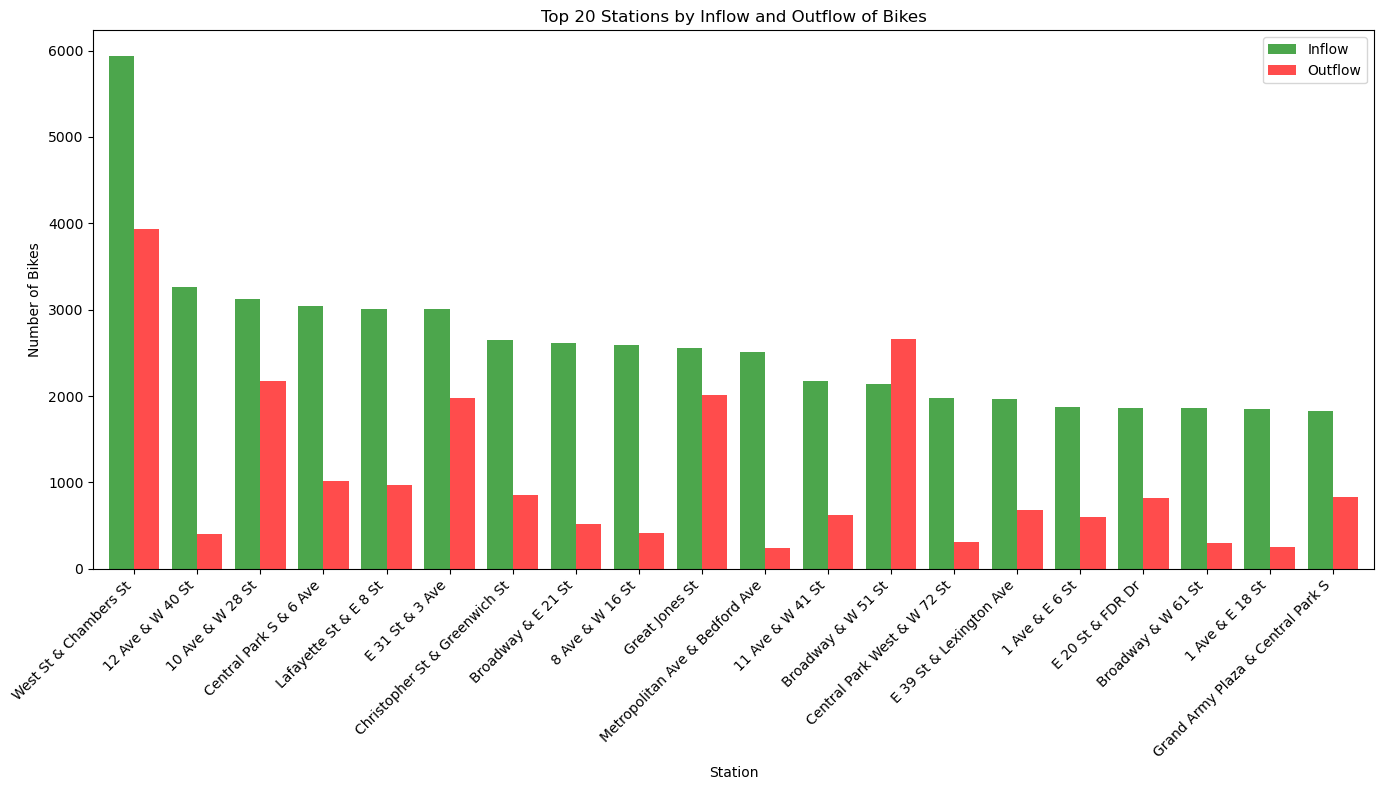

In [95]:
'''Plot for top 20 stations by inflow and outflow of bikes stations with the highest volume of incoming and outgoing bike rentals. 
   This analysis helps identify which stations are major hubs for bike distribution and which experience high demand, guiding resource 
   allocation and operational strategies.'''

inflow = df['end_station_name'].value_counts()
outflow = df['start_station_name'].value_counts()

# Create a DataFrame for inflow and outflow data
stations = set(inflow.index).union(set(outflow.index))
data = {
    'Station': list(stations),
    'Inflow': [inflow.get(station, 0) for station in stations],
    'Outflow': [outflow.get(station, 0) for station in stations]
}
df_flow = pd.DataFrame(data)

# Set the number of top stations to display
top_n = 20
df_flow = df_flow.sort_values(by='Inflow', ascending=False).head(top_n)

# Plot the inflow and outflow for each station
fig, ax = plt.subplots(figsize=(14, 8))

# Plot inflow and outflow data as grouped bars
df_flow.set_index('Station').plot(kind='bar', width=0.8, ax=ax, color=['green', 'red'], alpha=0.7)

# Add titles and labels
plt.title(f'Top {top_n} Stations by Inflow and Outflow of Bikes')
plt.xlabel('Station')
plt.ylabel('Number of Bikes')
plt.xticks(rotation=45, ha='right')  # Tilt x-axis labels for readability
plt.legend(['Inflow', 'Outflow'])
plt.tight_layout()  # Adjust layout to prevent overlap

# Show the plot
plt.show()


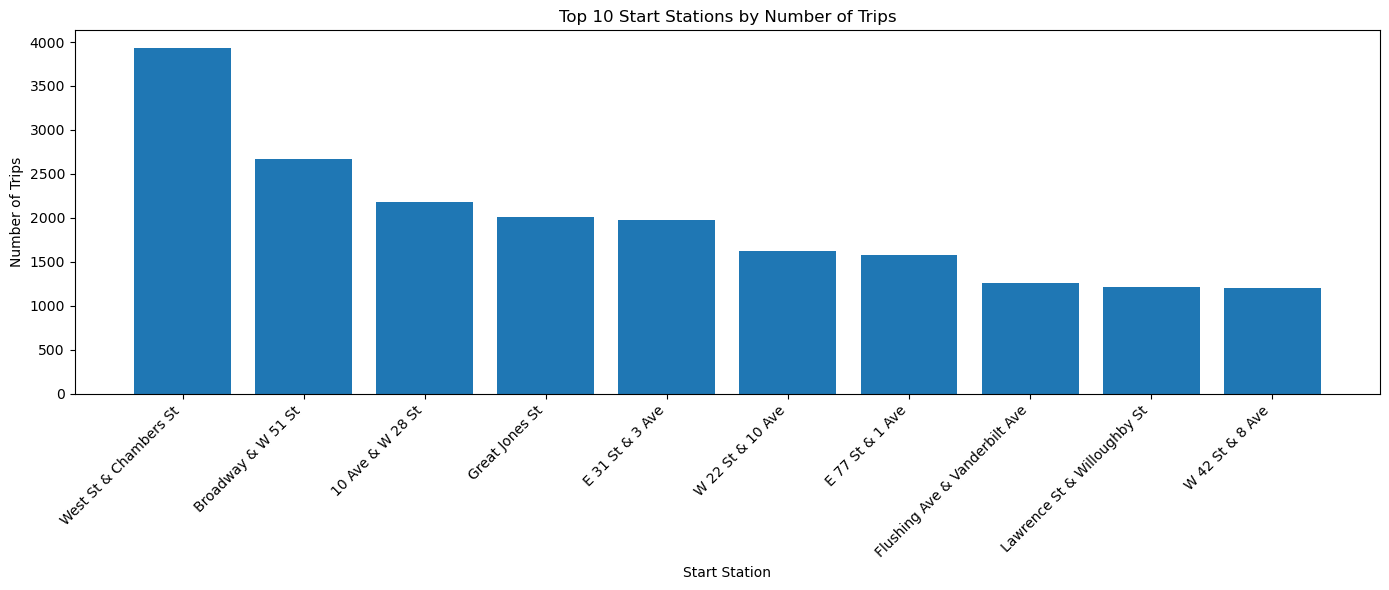

In [96]:
'''Plot for high-Demand Stations which Identifies the top 10 most popular start stations, helping to understand where bike 
   demand is highest.'''

# Count trips starting at each station
start_station_counts = df['start_station_name'].value_counts()
# Get the top 10 start stations
top_10_start_stations = start_station_counts.head(10)
# Plot top 10 start stations
plt.figure(figsize=(14, 6))
plt.bar(top_10_start_stations.index, top_10_start_stations.values)
plt.title('Top 10 Start Stations by Number of Trips')
plt.xlabel('Start Station')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

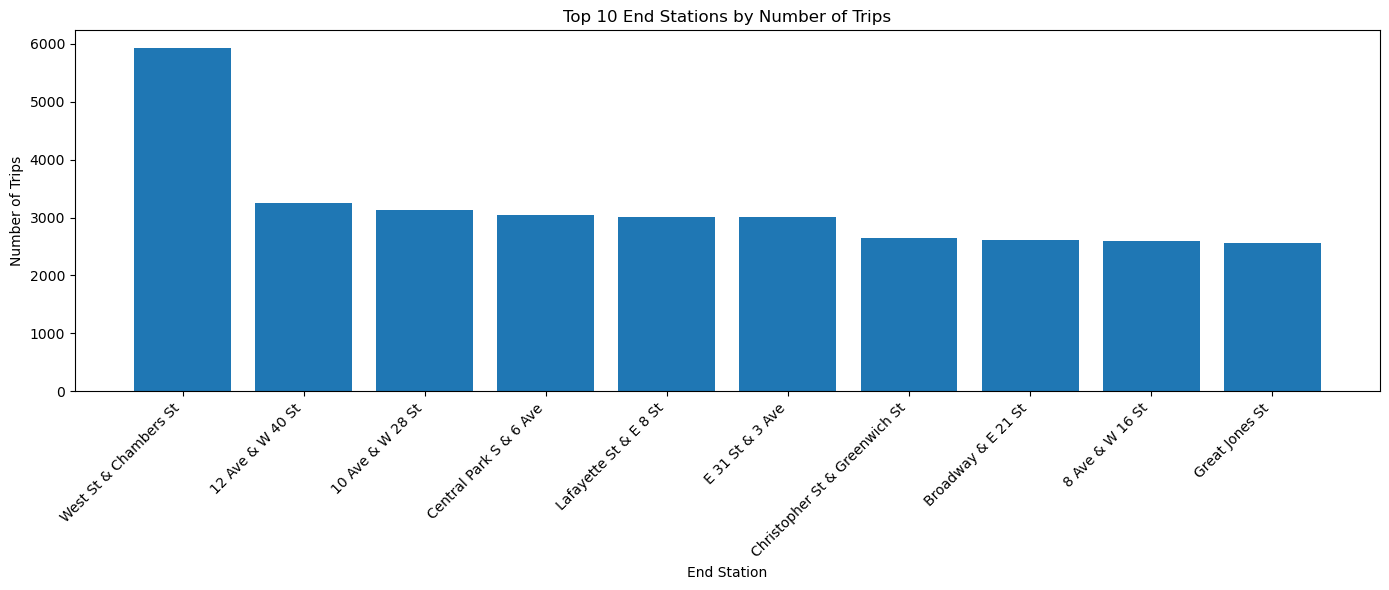

In [97]:
'''Plot for high-Demand Stations which Identifies the top 10 most popular end stations, helping to understand where bike 
   demand is highest.'''

# Count trips ending at each station
end_station_counts = df['end_station_name'].value_counts()
# Get the top 10 end stations
top_10_end_stations = end_station_counts.head(10)
# Plot top 10 end stations
plt.figure(figsize=(14, 6))
plt.bar(top_10_end_stations.index, top_10_end_stations.values)
plt.title('Top 10 End Stations by Number of Trips')
plt.xlabel('End Station')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Estimating how bikes can be distributed across different stations to  minimize shortages and surpluses
  Objective: to identify stations that frequently run out of bikes or have too many bikes left unused.
 
 


This helps calculates the net balance at each station by comparing the number of trips starting and ending at each station. Stations with shortage are likely to need more bikes, while those with positive net balance might have an oversupply.



In [98]:

# Count the number of trips starting and ending at each station
start_counts = df['start_station_name'].value_counts()
end_counts = df['end_station_name'].value_counts()

# Combine the counts into a DataFrame
station_balance = pd.DataFrame({
    'outflow': start_counts,
    'inflow': end_counts
}).fillna(0)  # Fill NaN values with 0 for stations that may not have both inflow and outflow

# Calculate the net balance (inflow - outflow) for each station
station_balance['net_balance'] = station_balance['inflow'] - station_balance['outflow']

# Sort by net balance
station_balance_sorted = station_balance.sort_values(by='net_balance')

# Recommendations based on the analysis:
# 1. negative net balance - Stations may need more bikes allocated to them.
# 2. positive net balance - Stations might have excess bikes and could distribute them to other stations.

# Optional: Identify stations that frequently have shortages or surpluses
shortage_stations = station_balance[station_balance['net_balance'] < 0].sort_values('net_balance', ascending=False).head(10)
surplus_stations = station_balance[station_balance['net_balance'] > 0].sort_values('net_balance').head(10)

print("Stations with frequent bike shortages:")
print(shortage_stations)

print("\nStations with frequent bike surpluses:")
print(surplus_stations)

Stations with frequent bike shortages:
                            outflow  inflow  net_balance
97 St & 23 Ave                  1.0     0.0         -1.0
47 Ave & 104 St                 1.0     0.0         -1.0
Beverley Rd & Nostrand Ave      1.0     0.0         -1.0
57 Rd & 59 St                   1.0     0.0         -1.0
56 Ave & Junction Blvd          1.0     0.0         -1.0
56 Ave & 92 St                  1.0     0.0         -1.0
Tibbett Ave & W 234 St          1.0     0.0         -1.0
Herkimer St & Eastern Pkwy      1.0     0.0         -1.0
Buffalo Ave & St John's Pl      1.0     0.0         -1.0
Dyckman St & 10 Ave             1.0     0.0         -1.0

Stations with frequent bike surpluses:
                                     outflow  inflow  net_balance
Columbus Park - Clinton St & 9 St        0.0     1.0          1.0
St Marks Ave & Thomas S. Boyland St      7.0     8.0          1.0
Sedgwick Ave & W Burnside Ave           30.0    31.0          1.0
Park Ave & E 162 St           

# 2. ML-Driven Solution for Demand Forecast, Stock Optimisation and Overall Stock Needed

Objective: In this step, we'll develop models to predict bike demand, optimize bike distribution, and estimate overall stock requirements. 

## Demand Prediction Modeling
Here we will build models to predict bike demand at each station. Random Forest model is used here to predict demand based on various features such as hours of the day, day of the week, and start station name. 

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import time
from tqdm import tqdm

# Start timing
start_time = time.time()

# Prepare the dataset for modeling
df_ml = df[['start_station_name', 'hour_of_day', 'day_of_week']]
data = df_ml.groupby(['start_station_name', 'hour_of_day', 'day_of_week']).size().reset_index(name='demand')

# Features and target variable
X = data[['start_station_name', 'hour_of_day', 'day_of_week']]
X = pd.get_dummies(X, columns=['start_station_name', 'day_of_week'])
y = data['demand']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

# Train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=42)
#model.fit(X_train, y_train)
# Create a progress bar for training
for _ in tqdm(range(1), desc="Training Model"):
    model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')

# End timing
end_time = time.time()
execution_time = end_time - start_time
print(f"Total execution time: {execution_time:.2f} seconds")

Training Model: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [1:06:38<00:00, 3998.39s/it]


Mean Absolute Error (MAE): 0.9952792146099442
Mean Squared Error (MSE): 4.18896689538689
Total execution time: 3999.47 seconds


## Optimization of Bike Distribution
Once the demand predictions are ready, we can optimize the distribution of bikes across stations. We will use linear programming for this purpose.

In [43]:
# Extract columns related to start stations
station_columns = [col for col in X_test.columns if col.startswith('start_station_name_')]

# Create a DataFrame with only the station-related columns
station_data = X_test[station_columns]

# Convert the one-hot encoded columns back to station names and their corresponding values
# This will give us a DataFrame with two columns: 'station_name' and 'value'
station_names = []
station_values = []

for index, row in station_data.iterrows():
    for col in station_columns:
        if row[col] == 1:
            station_names.append(col.replace('start_station_name_', ''))
            station_values.append(row[col])
            break  # Move to the next row after finding the active station

# Convert lists to a DataFrame
stations_df = pd.DataFrame({
    'start_station_name': station_names,
    'value': station_values
})


In [77]:
from scipy.optimize import linprog

# Predict demand using the model
predicted_demand = pd.DataFrame(y_pred, columns=['Predicted_Demand'])


# Create a dictionary of predicted demand for each station
demand_predictions = dict(zip(stations_df['start_station_name'], predicted_demand['Predicted_Demand']))
stations = list(demand_predictions.keys())

# Define coefficients for the objective function (Minimize total bikes)
c = [1] * len(stations)  # Minimize total number of bikes allocated

# Define constraints matrix and demand constraints
A_eq = []
b_eq = []

# Each station's bike allocation should meet its predicted demand
for station in stations:
    # Constraint: allocation at this station should be at least its predicted demand
    A_eq.append([1 if s == station else 0 for s in stations])
    b_eq.append(demand_predictions[station])

# Solve the linear programming problem
result = linprog(c, A_eq=A_eq, b_eq=b_eq, bounds=[(0, None)]*len(stations), method='highs')

# Extract the optimal bike distribution
optimal_bikes = result.x

# Create a dictionary of the optimal bike distribution
optimal_distribution = dict(zip(stations, optimal_bikes))

optimal_distribution


Optimal Bike Distribution: {'W 21 St & 6 Ave': 1.16, 'E 170 St & Webster Ave': 1.0, 'W 30 St & 8 Ave': 1.82, 'Frederick Douglass Blvd & W 117 St': 3.02, 'Reade St & Broadway': 10.76, 'Carlton Ave & Dean St': 1.14, 'Ave C & E 16 St': 1.02, 'Allen St & Stanton St': 2.11, 'Sands St & Jay St': 1.16, 'DeKalb Ave & S Portland Ave': 2.2, 'Lexington Ave & E 120 St': 1.0, 'Smith St & 9 St': 3.66, 'Duffield St & Willoughby St': 1.85, '33 St & 47 Ave': 1.0, 'Green St & McGuinness Blvd': 1.0, 'W 37 St & 10 Ave': 3.61, 'Clermont Ave & Lafayette Ave': 1.42, 'Jay St & York St': 1.37, '6 Ave & Canal St': 1.0, 'E 91 St & Park Ave': 1.32, 'W 47 St & 9 Ave': 7.31, 'W 20 St & 10 Ave': 3.05, 'E 156 St & Brook Ave': 1.0, 'E 47 St & 2 Ave': 2.85, 'Court St & Nelson St': 1.38, 'W 36 St & 7 Ave': 1.0, 'Henry St & Grand St': 1.55, 'Prospect Park West & 8 St': 3.93, 'Bank St & Washington St': 3.06, 'W 76 St & Columbus Ave': 3.13, 'E 41 St & Madison Ave (SE corner)': 13.01, 'E 43 St & Madison Ave': 4.24, 'Putnam 

## Total Stock Optimization
Finally, let's estimate the total number of bikes required to satisfy demand without excessive overstock.

In [83]:
# Calculate the total number of bikes required
total_required_bikes = sum(optimal_distribution.values())

print(f"Total bikes required: {int(total_required_bikes)}")


Total bikes required: 3024
